In [1]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Dataset_Numerical_Classes.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [4]:
# After experimentation with and without ordering the class labels,
# We decided to order them because this resulted in more expressive path coefficients

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [5]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : int  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : int  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : int  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : int  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : int  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : int  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  0.188 0.163 0.146 0.146 0.188 ...
 $ Sensation_seeking: num  0.07 0.118 0.132 0.07 0.118 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 1 1 1 1 1

In [6]:
# Inspecting the unique values (and their ordinal order if applicable) of all the variables

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 35-44 25-34 18-24 65+   45-54 55-64
Levels: 18-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65+

[1] "gender"


[1] 0 1

[1] "education"


[1] Professional certificate/ diploma Doctorate degree                 
[3] Masters degree                    Left school at 18                
[5] Left school at 16                 University degree                
[7] College or university dropout     Left school before 16            
[9] Left school at 17                
9 Levels: Left school before 16 < Left school at 16 < ... < Doctorate degree

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 6 5 4 3 0 1 2
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

[1] "Cannabis"


[1] 0 4 3 2 1 6 5
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

[1] "Meth"


[1] 0 3 1 6 4 2 5
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

In [7]:
# Creating the cor matrix and visually inspecting it

M <- lavCor(df)
M

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.150467605,-0.02788125,-0.23929895,0.07019570,0.211937645,0.1395597469,-0.1581440054,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.070392849,-0.06116698,0.13599424,-0.22038676,-0.183906636,-0.0660827751,0.1652529347,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.102837319,0.12035190,0.06496818,0.09246585,0.245952853,0.1348312591,-0.0328075960,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.000000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,-0.1382315378,-0.0043360538,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.432967246,1.00000000,0.23606577,0.15906490,0.318780114,-0.0628348289,0.1031308407,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.016625590,0.23606577,1.00000000,0.03280548,-0.059995922,-0.1319440731,0.2293739645,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.215145199,0.15906490,0.03280548,1.00000000,0.249608607,0.1672650723,-0.0823730754,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.398678551,0.31878011,-0.05999592,0.24960861,1.000000000,0.2963585991,-0.0871754839,-0.004265342,-0.29270898,-0.25711483
Impulsive,0.13955975,-0.06608278,0.13483126,-0.138231538,-0.06283483,-0.13194407,0.16726507,0.296358599,1.0000000000,0.0001230195,-0.027115369,-0.17786880,-0.15620223
Sensation_seeking,-0.15814401,0.16525293,-0.03280760,-0.004336054,0.10313084,0.22937396,-0.08237308,-0.087175484,0.0001230195,1.0000000000,0.007608059,0.25471207,0.07253836


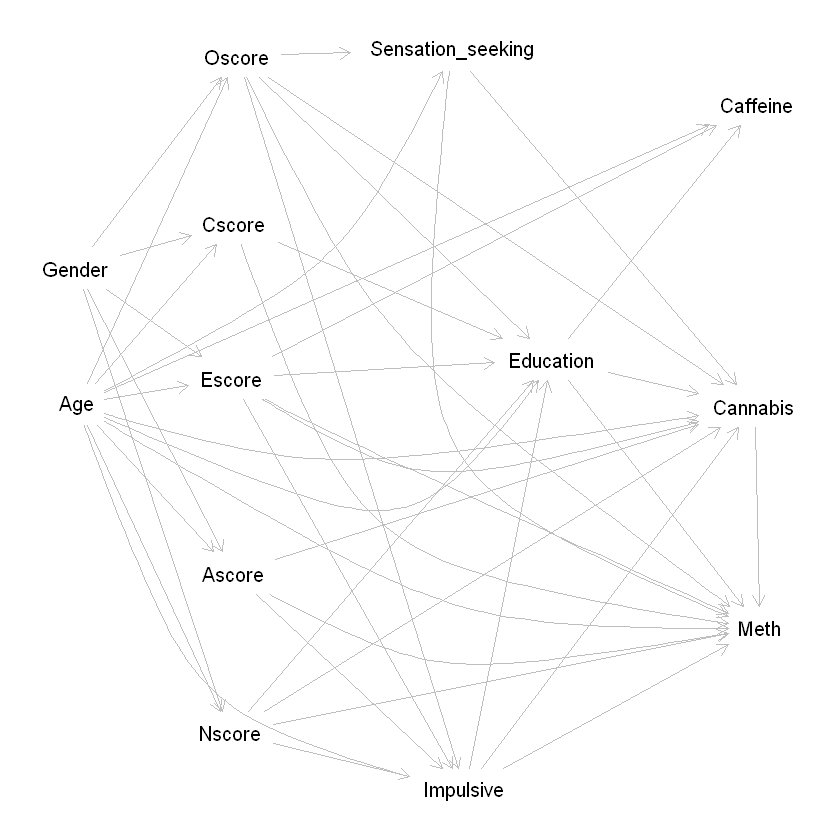

In [8]:
# Creating and plotting the DAG

graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Impulsive
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Meth [pos="0.357,0.605"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Education
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Education
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Education
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}
')
plot(graph)

In [9]:
# Inspecting the implied conditional independencies

impliedConditionalIndependencies(graph)

Age _||_ Gndr
Ascr _||_ Cffn | Age, Edct, Escr
Ascr _||_ Cffn | Age, Cscr, Escr, Impl, Nscr, Oscr
Ascr _||_ Cffn | Age, Escr, Gndr, Impl, Nscr, Oscr
Ascr _||_ Cscr | Age, Gndr
Ascr _||_ Edct | Age, Cscr, Escr, Impl, Nscr, Oscr
Ascr _||_ Edct | Age, Escr, Gndr, Impl, Nscr, Oscr
Ascr _||_ Escr | Age, Gndr
Ascr _||_ Nscr | Age, Gndr
Ascr _||_ Oscr | Age, Gndr
Ascr _||_ Sns_ | Age, Oscr
Ascr _||_ Sns_ | Age, Gndr
Cffn _||_ Cnnb | Age, Edct, Escr
Cffn _||_ Cscr | Age, Edct, Escr
Cffn _||_ Gndr | Age, Ascr, Cscr, Escr, Nscr, Oscr
Cffn _||_ Gndr | Age, Cscr, Escr, Impl, Nscr, Oscr
Cffn _||_ Gndr | Age, Edct, Escr
Cffn _||_ Impl | Age, Edct, Escr
Cffn _||_ Meth | Age, Edct, Escr
Cffn _||_ Nscr | Age, Edct, Escr
Cffn _||_ Oscr | Age, Edct, Escr
Cffn _||_ Sns_ | Age, Oscr
Cffn _||_ Sns_ | Age, Edct, Escr
Cnnb _||_ Cscr | Age, Edct, Escr, Gndr, Impl, Nscr, Oscr
Cnnb _||_ Cscr | Age, Ascr, Edct, Escr, Impl, Nscr, Oscr
Cnnb _||_ Gndr | Age, Ascr, Cscr, Escr, Nscr, Oscr
Cnnb _||_ Gndr | Age, Ascr, E

In [10]:
# Inspecting the test statistics of the implied conditional independencies

localTests( graph, sample.cov=M, sample.nobs=nrow(df) )

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.1662084680,-0.077243747
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-0.0791179535,0.011146538
"Ascr _||_ Cffn | Age, Cscr, Escr, Impl, Nscr, Oscr",-0.013665313,5.539041e-01,-0.0588494961,0.031574703
"Ascr _||_ Cffn | Age, Escr, Gndr, Impl, Nscr, Oscr",-0.008808198,7.028191e-01,-0.0540072197,0.036426817
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.1701353433,0.256430039
"Ascr _||_ Edct | Age, Cscr, Escr, Impl, Nscr, Oscr",0.016261162,4.811969e-01,-0.0289806528,0.061436546
"Ascr _||_ Edct | Age, Escr, Gndr, Impl, Nscr, Oscr",-0.006420947,7.809255e-01,-0.0516264836,0.038810830
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.1069380088,0.195234935
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-0.2755125397,-0.189976666
"Ascr _||_ Oscr | Age, Gndr",0.077177270,7.994230e-04,0.0321168054,0.121926447


In [11]:
# Extracting the coordinates

cg <- coordinates(graph)

# Fitting the graph with training data and our cov matrix

fit <- lavaan( toString(graph,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML",auto.var=TRUE) # Estimating using maximum likelihood

# Summary of the fit

summary(fit)

lavaan 0.6-7 ended normally after 18 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         55
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              1523.156
  Degrees of freedom                                33
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    1.944    0.052
  

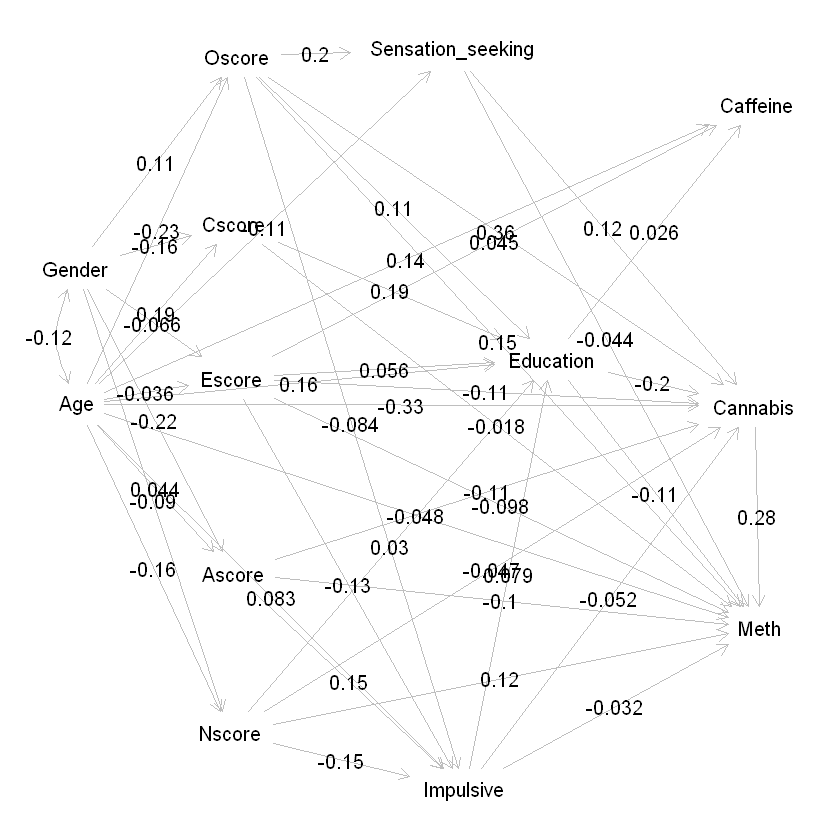

In [12]:
# Estimating the path coefficients

fg <- lavaanToGraph(fit, digits=2)
coordinates(fg) <- cg

# Plotting the graph with the estimated coefficients

plot(fg, show.coefficients=TRUE)